In [9]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

plt.style.use('default')
plt.style.use('bmh')

[0.]
[0.         3.14159265]
[0.         1.57079633 3.14159265 4.71238898]
[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]
[0.         0.39269908 0.78539816 1.17809725 1.57079633 1.96349541
 2.35619449 2.74889357 3.14159265 3.53429174 3.92699082 4.3196899
 4.71238898 5.10508806 5.49778714 5.89048623]
[0.         0.19634954 0.39269908 0.58904862 0.78539816 0.9817477
 1.17809725 1.37444679 1.57079633 1.76714587 1.96349541 2.15984495
 2.35619449 2.55254403 2.74889357 2.94524311 3.14159265 3.33794219
 3.53429174 3.73064128 3.92699082 4.12334036 4.3196899  4.51603944
 4.71238898 4.90873852 5.10508806 5.3014376  5.49778714 5.69413668
 5.89048623 6.08683577]
[0.         0.09817477 0.19634954 0.29452431 0.39269908 0.49087385
 0.58904862 0.68722339 0.78539816 0.88357293 0.9817477  1.07992247
 1.17809725 1.27627202 1.37444679 1.47262156 1.57079633 1.6689711
 1.76714587 1.86532064 1.96349541 2.06167018 2.15984495 2.25801972
 2.35619449 2.45436926 2.55254

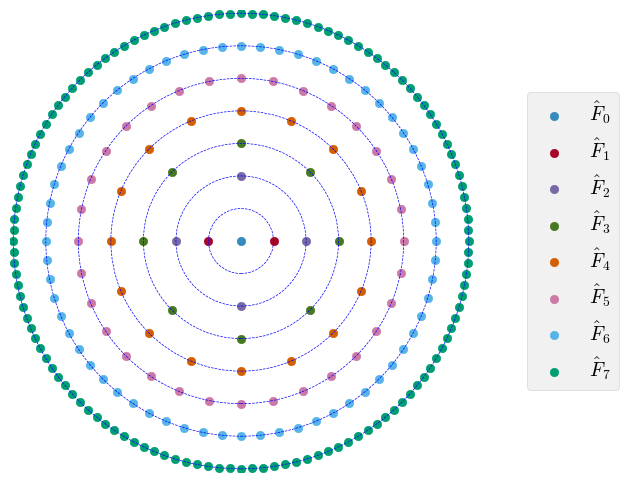

In [10]:

n_max = 8

def single_phase_plot(n):
    fig, ax = plt.subplots(figsize=(8, 6))  # Increase figure size



    N = 2**n 

    R = 10*n # assuming mm

    thetas = np.array([j * (2* pi / N) for j in range(N)])

    X = R*np.cos(thetas)
    Y = R*np.sin(thetas)

    print(thetas)
    ax.scatter(X, Y, label=fr"$\hat{{F}}_{{{n}}}$")

    circle = plt.Circle((0, 0), R, color='b', fill=False, linestyle='--')
    ax.add_artist(circle)
    ax.set_aspect('equal')
    ax.axis('off')

    # Add extra space on the right for the legend
    ax.set_xlim((-R-1, R+15))
    ax.set_ylim((-R-1, R+1))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    plt.show()

fig, ax = plt.subplots(figsize=(8, 6))  # Increase figure size

for n in range( n_max):

    N = 2**n 

    R = 10*n # assuming mm

    thetas = np.array([j * (2* pi / N) for j in range(N)])

    X = R*np.cos(thetas)
    Y = R*np.sin(thetas)

    print(thetas)
    ax.scatter(X, Y, label=fr"$\hat{{F}}_{{{n}}}$")

    circle = plt.Circle((0, 0), R, color='b', fill=False, linestyle='--')
    ax.add_artist(circle)
    ax.set_aspect('equal')
    ax.axis('off')

# Add extra space on the right for the legend
ax.set_xlim((-R-1, R+15))
ax.set_ylim((-R-1, R+1))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.show()


In [11]:
from qiskit import QuantumCircuit

def print_qft(n, do_swaps=True, inverse=False, draw_mpl=False, name=None):
    """
    Build and print (or draw) an n-qubit QFT using Qiskit.

    Parameters:
    - n (int): number of qubits
    - do_swaps (bool): whether to include final qubit-reversal swaps (default True)
    - inverse (bool): if True, return/print the inverse QFT
    - draw_mpl (bool): if True, draw using matplotlib (requires qiskit visualization backend)
    - name (str|None): optional circuit name

    Returns:
    - QuantumCircuit: the constructed QFT circuit (or its inverse if inverse=True)
    """
    # pi and plt are available from earlier cells in the notebook
    qc = QuantumCircuit(n, name=(name or f"qft_{n}"))

    # Construct QFT: for each qubit j apply controlled-phase from k>j then H on j
    for j in range(n):
        for k in range(j + 1, n):
            qc.cp(pi / 2 ** (k - j), k, j)
        qc.h(j)

    # Optional final swap to reverse qubit order
    if do_swaps:
        for i in range(n // 2):
            qc.swap(i, n - i - 1)

    # Optionally invert
    if inverse:
        qc = qc.inverse()

    # Print or draw
    if draw_mpl:
        fig = qc.draw(output="mpl")
        plt.show()
    else:
        print(qc)

    return qc

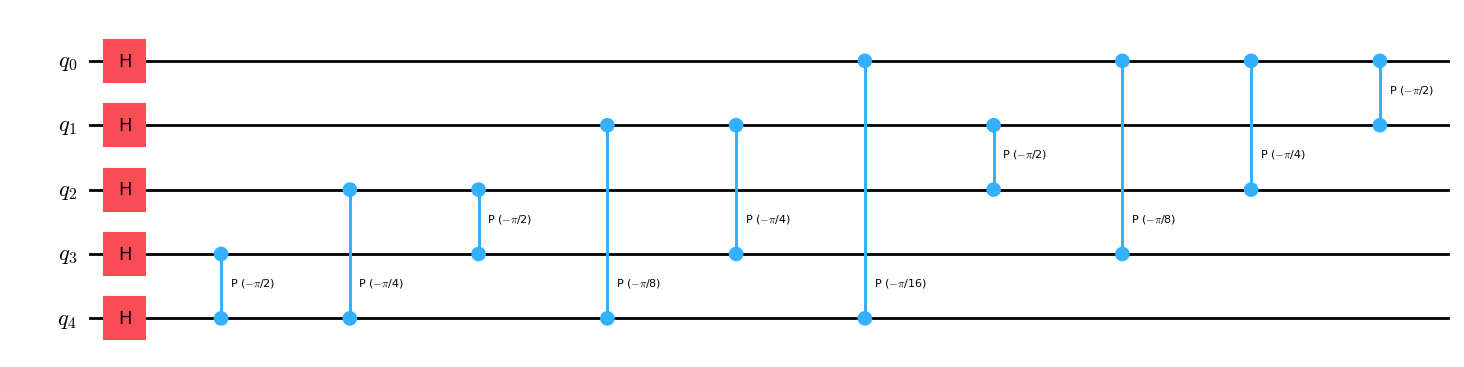

In [26]:
print_qft(5, inverse= True, draw_mpl=True, do_swaps=False)

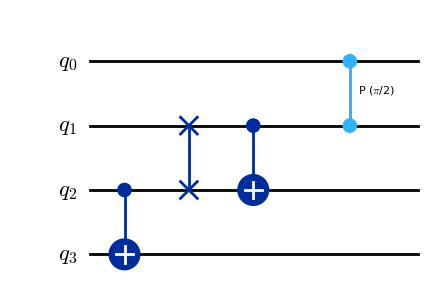

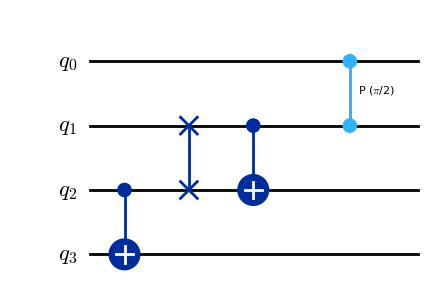

In [23]:
qc = QuantumCircuit(4)

qc.cx(2,3)
qc.swap(1,2)
qc.cx(1,2)
qc.cp(pi/2,1,0)
qc.draw(output="mpl")

for i in range(1,6):
    print_qft(i, draw_mpl=True, inverse=True,do_swaps=False)
    single_phase_plot(i)